# Membership cost
This notebook explores the expected membership cost from the survey

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

In [2]:
df = pd.read_csv("../data/survey2024.csv")

# Check amount willing to pay for memebership

In [3]:
willing_to_pay_df = df.iloc[:, 39].copy()

In [4]:
# Get data, and replace nan with "No answer"
willing_to_pay = np.where(pd.isnull(willing_to_pay_df), "No answer", willing_to_pay_df)

In [5]:
unique_values, counts = np.unique(willing_to_pay, return_counts=True)

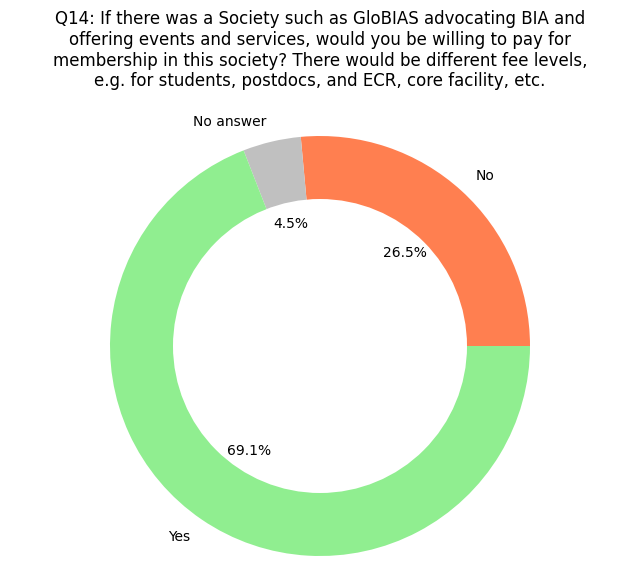

In [6]:
# Set colors based on label
colors = ['lightgreen' if value == 'Yes' else 'coral' if value == 'No' else 'silver' for value in unique_values]

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=unique_values, colors=colors,autopct='%1.1f%%')
plt.axis('equal')
plt.gca().add_artist(plt.Circle((0,0),0.7,fc='white')) # Add a white circle in the center for the hole
plt.title("\n".join(textwrap.wrap(willing_to_pay_df.name, width=64))+"\n")
plt.savefig("../figures/WillingToPay.png", bbox_inches='tight')
plt.show()

# Check suggested value

In [7]:
value_df = df.iloc[:, 40].copy()

In [8]:
# Check our unique values
for value in value_df.unique():
    print(value)

180
25
120
50
100
nan
200
60
20
50-100
300
15
6
40
30
80
5-25
55
35
167.02
150
10
200 to 500
0
400
90
75
350
230
70
45
250
109
7
33
110
62.5
30 PhD student/35 postdocs / 50 PI /70 industry
37.5
17.5
5


In [9]:
# As of 05/05/2024, some clean up is needed (strings are present)
# for now just doing dome intuitive ballpark replacement

value_df.replace("50-100", 75, inplace=True)
value_df.replace("5-25", 15, inplace=True)
value_df.replace("200 to 500", 300, inplace=True)
value_df.replace("30 PhD student/35 postdocs / 50 PI /70 industry", 45, inplace=True)

# Now get data in float
value_df = value_df.astype(float)

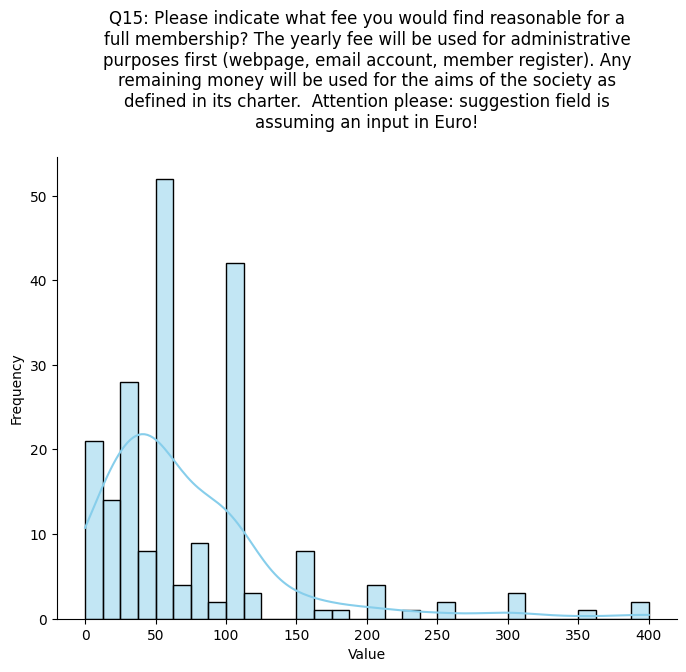

Mean value: 72.79
Median value: 50.00


In [10]:
# Plot the histogram
plt.figure(figsize=(8, 6))
sns.histplot(value_df, bins=32, color='skyblue', kde=True)
plt.title('Histogram for value distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title("\n".join(textwrap.wrap(value_df.name, width=64))+"\n")

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig("../figures/MembershipFeeHistogram.png", bbox_inches='tight')


plt.show()
print(f"Mean value: {np.nanmean(value_df):.2f}")
print(f"Median value: {np.nanmedian(value_df):.2f}")